### * Introduction

In this project, I implemented Linear Regression from scratch using Python and NumPy, without relying on any machine learning libraries such as scikit-learn.
The goal of the project is to understand the full mathematical pipeline behind linear regression, including:

- Preparing the dataset

- Visualizing the data

- Building the hypothesis function

- Implementing the Cost Function (MSE)

- Implementing Gradient Descent manually

- Training the model to find the optimal parameters (θ)

- Evaluating and visualizing the results

This project is designed to give a clear, step-by-step understanding of how linear regression actually works behind the scenes.

### * Importing Libraries

In [202]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

### * Loading Dataset

In [203]:
# Read Data
path = os.path.join(os.getcwd(), 'data/data.csv')
df = pd.read_csv(path, header=None, names=['population', 'profit'])
df.head() 

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [204]:
# Show Data Details
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### * Data Visualization

<Axes: xlabel='population', ylabel='profit'>

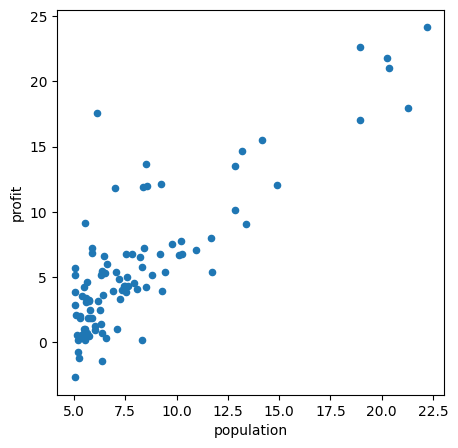

In [205]:
# Draw Data
df.plot(kind='scatter', x='population', y='profit', figsize=(5,5))

### * Prepare Data

In [206]:
# Adding a new column called ones before the data
df.insert(0, 'ones', 1)
df.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [207]:
# Separate X (training data) from y (target variable)
X = df.drop('profit', axis=1)
y = df['profit']

In [208]:
# Convert from data frames to numpy matrices
X = np.array(X)
y = np.array(y)
theta = np.zeros(X.shape[1])
m = len(X)

### * Cost Function

In [209]:
# Cost Function
def computeCost(X, y, theta):
    predictions = X @ theta
    cost = 1 / (2 * m) * np.sum((predictions - y)**2)
    return cost

### * Gradient Descent

In [210]:
# GD Function
def gradientDecent(X, y, theta, alpha, iters):
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X @ theta) - y
        gradient = (error @ X) / m
        theta = theta - alpha * gradient
        cost[i] = computeCost(X, y, theta)

    return theta, cost        

### * Training

In [211]:
# Initialize variables for learning rate and iterations
alpha = 0.015
iters = 1000

In [212]:
# Perform gradient descent to "fit" the model parameters
g, cost = gradientDecent(X, y, theta, alpha, iters)
np.save('model_theta.npy', g)

### * Evaluation

In [213]:
# mean squared error of train dataset
predictions = X @ g
mse_train = np.mean((predictions - y)**2)
print('mse (train) = ', mse_train)

mse (train) =  8.966745181225972


In [214]:
# mean absolute error of train dataset
mae_train = np.mean(np.abs(predictions - y))
print('mae (train) = ', mae_train)

mae (train) =  2.2107755760211014


In [215]:
# R2 error of train dataset
ss_res = np.sum((y - predictions)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2_train = 1 - (ss_res/ss_tot)
print('R2 (train) = ', r2_train)

R2 (train) =  0.701605515773319


In [216]:
# Get best fit line
x = np.linspace(df.population.min(), df.population.max(), 100)
f = g[0] + g[1] * x

### * Results

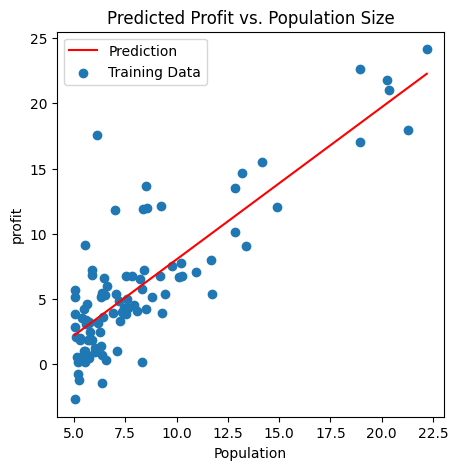

In [217]:
# Draw the line
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(df.population, df.profit, label='Training Data')
ax.set_xlabel('Population')
ax.set_ylabel('profit')
ax.set_title('Predicted Profit vs. Population Size')
ax.legend(loc=2)

Text(0.5, 1.0, 'Error vs. Training Epoch')

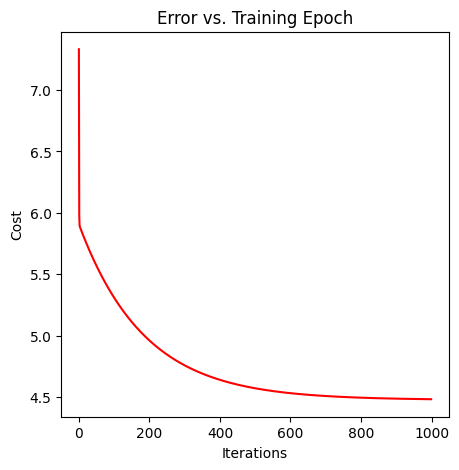

In [218]:
# Draw error graph
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

### Conclusion

By building Linear Regression from scratch, we were able to understand the full mathematical workflow of the algorithm:

- We computed the cost function manually

- We implemented gradient descent step by step

- We successfully trained the model to learn the optimal θ

- We visualized both the fitted regression line and the error reduction over iterations

This project demonstrates the core concepts behind supervised learning and provides a strong foundation before moving to more advanced algorithms or using machine-learning libraries like scikit-learn.
The final learned parameters were saved so they can be reused without retraining the model.